In [1]:
import numpy as np
import matplotlib.pyplot as plt

Operators we used in the course acted on vectors to return other vectors.

Most simple (but important) ones we denoted using letters

I  -- for identity

J -- for rotation by 90deg

L -- for rotation by 45deg

R(theta) -- rotation by theta angle


These operators are *linear* in the following sense (using J as a specific example):

J (a + b) = (J a) + (J b)

and

J (xa) = x (J a)

This property is kind of generalization of muplication. What we mean is this: consider a simple function
f x = 3*x

f (x + y) = 3*(x + y) = 3*x + 3*y = (f x) + (f y)

f (5x) = 3*(5x) = 3*5*x=5*(3*x) = 5*(f x)

Linear operators are important because they are both simple and powerful and ubiqutous.

A general linear operators (let's call it Y) takes a vector and returns another vector, all the while respecting the rules of linearity. This means that we only need a handfull of numbers to fully describe the linear operator. Indeed

Y a = Y (a1*e1 + a2*e2) = (Y (a1*e1)) + (Y (a2*e2)) =
a1*(Y e1) + a2*(Y e2)

All we need to know is how the operator transforms the basis arrows e1 and e2.

The information on how the operator Y transforms the basis arrows-vectors is encoded in just four numbers (for 2D):

Y e1 = q1 = y11 e1 + y12 e2

Y e2 = q2 = y21 e1 + y22 e2

The four numbers (y11, y12, y21, y22) completely specify the operator. These numbers are called **components of the operator in a given basis**, in full analogy with components of a vector in a given basis.

**Example**:
Let's find the components of the identity operator I:

I e1 = e1 = 1 e1 + 0 e2

I e2 = e2 = 0 e2 + 1 e2

Thus, the components are

I --> (i11=1, i12=0, i21=0, i22=1).

A table form of writing these components is often used, called matrix form:

1 0

0 1

Now let's consider a more general linear operator. Say its components are

Y = (y11=2, y12=3, y21=5, y22=-7)

Let's see how what it does to a vectors e1 and e2:

Y e1 = 2*e1 + 3*e2
Y e2 = 5*e1 - 7*e2

For a general vector  a = (ax, ay) = (a1, a2) = a1*e1+a2*e2
the action is calculated in a straightforward way

Y a = a1*(Y e1) + a2*(Y e1) = a1 * (y11*e1+y12*e2) + a2*(y21*e1+y22*e2)

Open the parenthesis and collect terms with e1 and then with e2 to get

Y a = (a1*y11 + a2*y21) * e1 + (a1*y12 + a2*y22)*e2

Thus the components of the transformed vector b = Y a are given by

b1 = a1*y11 + a2*y21

b2 = a1*y12 + a2*y22


Let's study this operator in more detail

In [44]:
# define an operator as function on vectors
# input is a vector a = (a1, a2)
# output is also a vector b = (b1, b2)

def Y(a):

  y11 = 2
  y12 = 3
  y21 = 5
  y22 = -7

  a1 = a[0]
  a2 = a[1]

  b1 = a1*y11 + a2*y21
  b2 = a1*y12 + a2*y22

  b = (b1, b2)

  return b

Let's **plot** the operator Y! ?

What is the plot of a usual function f? We plot in the axes "x" and "y" the value of f for each value of "x".

We will something similar for the operator. Only we will plot how Y transform various vectors.

We will be interested what the operator Y does to vectors/arrows of various directions. (We will not be interested in what Y does to vectors of the same direction but different lengths because it is trivial:
Action of Y on vector a scaled by a factor x is

Y (x*a) = x * (Y a)

is simply the action of Y on a and then scaled.)

In [3]:
# let's create a bunch of vectors in different directions with equal length 1
#

vectors = []

# split 2pi (full circle) into 60 steps
angles = np.linspace(0, 2*np.pi, 60)

for theta in angles:
  a = (np.cos(theta), np.sin(theta))  # calculate components
  vectors.append(a)  # add to the list of vectors

In [4]:
## now let's transform the vectors
transformed_vectors = []

for a in vectors:
  b = Y(a)
  transformed_vectors.append(b)

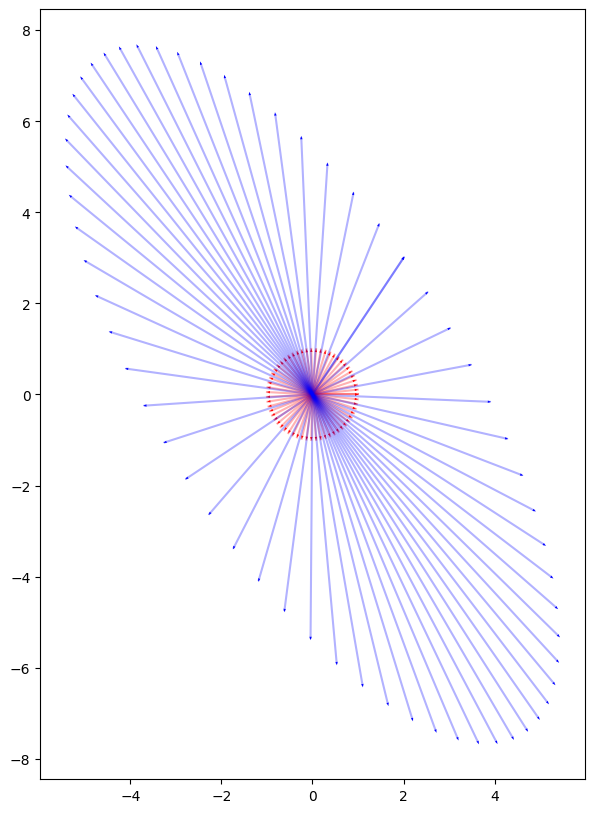

In [29]:
## Let's plot original vectors and transformed vectors on the same plot

plt.figure(figsize=[10,10])

for a in vectors:
  a1 = a[0]
  a2 = a[1]
  plt.plot([0, a1], [0, a2], color='r', alpha=0.3)
  plt.arrow(a1, a2, 0.01*a1, 0.01*a2, shape='full', lw=0, length_includes_head=True, head_width=.05, color='r')

for b in transformed_vectors:
  b1 = b[0]
  b2 = b[1]
  plt.plot([0, b1], [0, b2], color='b', alpha=0.3)
  plt.arrow(b1, b2, 0.01*b1, 0.01*b2, shape='full', lw=0, length_includes_head=True, head_width=.05, color='b')

plt.gca().set_aspect('equal', 'box')
plt.show()
plt.close()


As you can see, the operator makes an ellipsis out of a circle!

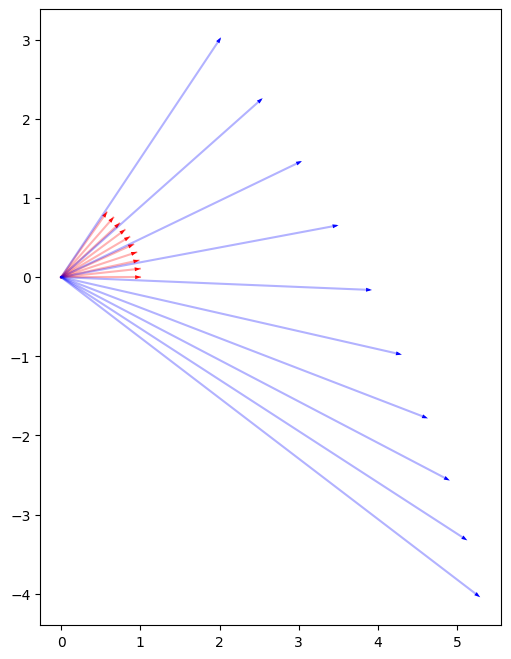

In [28]:
## Let's plot original vectors and transformed vectors on the same plot
## This time let's take several vectors

# vectors in the range from 0 to 10 (first 10 vectors)
n_from = 0
n_to = 10

plt.figure(figsize=[8,8])

for a in vectors[n_from:n_to]:
  a1 = a[0]
  a2 = a[1]
  plt.plot([0, a1], [0, a2], color='r', alpha=0.3)
  plt.arrow(a1, a2, 0.01*a1, 0.01*a2, shape='full', lw=0, length_includes_head=True, head_width=.05, color='r')

for b in transformed_vectors[n_from:n_to]:
  b1 = b[0]
  b2 = b[1]
  plt.plot([0, b1], [0, b2], color='b', alpha=0.3)
  plt.arrow(b1, b2, 0.01*b1, 0.01*b2, shape='full', lw=0, length_includes_head=True, head_width=.05, color='b')

plt.gca().set_aspect('equal', 'box')
plt.show()
plt.close()

Now you can play with range and compare various original vs transformed vectors

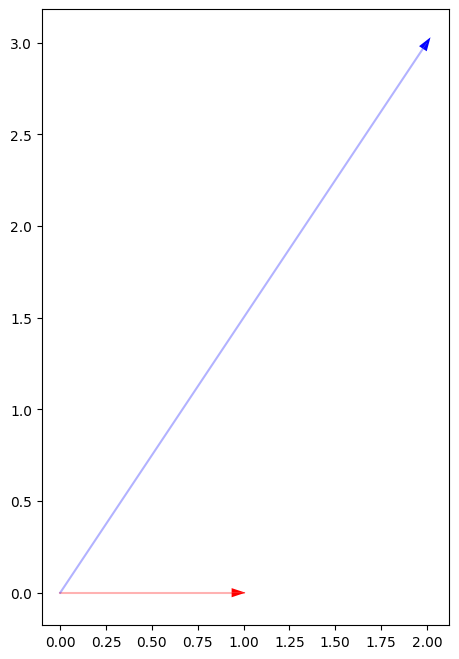

In [30]:
## simply change n_from to n_to
## Let's plot original vectors and transformed vectors on the same plot
## This time let's take several vectors

# vectors in the range from 0 to 10 (first 10 vectors)
n_from = 0
n_to = 1

# explore the first vector -- e1, pointing horizontally

plt.figure(figsize=[8,8])

for a in vectors[n_from:n_to]:
  a1 = a[0]
  a2 = a[1]
  plt.plot([0, a1], [0, a2], color='r', alpha=0.3)
  plt.arrow(a1, a2, 0.01*a1, 0.01*a2, shape='full', lw=0, length_includes_head=True, head_width=.05, color='r')

for b in transformed_vectors[n_from:n_to]:
  b1 = b[0]
  b2 = b[1]
  plt.plot([0, b1], [0, b2], color='b', alpha=0.3)
  plt.arrow(b1, b2, 0.01*b1, 0.01*b2, shape='full', lw=0, length_includes_head=True, head_width=.05, color='b')

plt.gca().set_aspect('equal', 'box')
plt.show()
plt.close()

In [31]:
## Now we can do it more efficiently

# let's create a function that transforms a unit vector pointing at an angle theta

def transform_with_Y(theta):
  # create unit vector pointing along theta
  a = (np.cos(theta), np.sin(theta))

  b = Y(a)  # transform using the operator Y

  # plot to compare
  plt.figure(figsize=[8,8])


  a1 = a[0]
  a2 = a[1]
  plt.plot([0, a1], [0, a2], color='r', alpha=0.3)
  plt.arrow(a1, a2, 0.01*a1, 0.01*a2, shape='full', lw=0, length_includes_head=True, head_width=.05, color='r')


  b1 = b[0]
  b2 = b[1]
  plt.plot([0, b1], [0, b2], color='b', alpha=0.3)
  plt.arrow(b1, b2, 0.01*b1, 0.01*b2, shape='full', lw=0, length_includes_head=True, head_width=.05, color='b')

  plt.gca().set_aspect('equal', 'box')
  plt.show()
  plt.close()


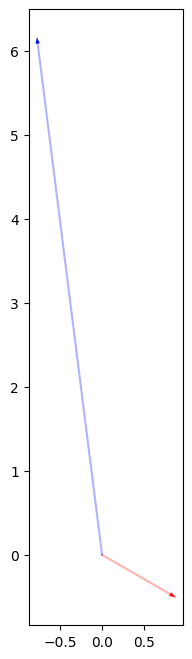

In [35]:
# Let's check various angles

#transform_with_Y(np.pi/4)
#transform_with_Y(np.pi/2)
transform_with_Y(-np.pi/6)

In [51]:
## Can we find a vector such that it is not rotated but only scaled?
# Y a = A * a  (Eigen-vector?)

# There exists an algebraic way to find such vectors.
# Linear algebra (algebra of linear operators on vectors) deals with these problems
Yop = np.array([[2, 5],
               [3, -7]])
np.linalg.eig(Yop)
# this function returns eigen-values A and eigen-vectors a
# notice there are two of them


(array([ 3.43717104, -8.43717104]),
 array([[ 0.96108609, -0.43203975],
        [ 0.27624902,  0.90185456]]))

In [41]:
# let's check
# first create a function that takes components rather than the angle
def transform_with_Y_components(a1, a2):
  a = (a1, a2)

  b = Y(a)  # transform using the operator Y

  # plot to compare
  plt.figure(figsize=[8,8])


  a1 = a[0]
  a2 = a[1]
  plt.plot([0, a1], [0, a2], color='r', alpha=0.3)
  plt.arrow(a1, a2, 0.01*a1, 0.01*a2, shape='full', lw=0, length_includes_head=True, head_width=.05, color='r')


  b1 = b[0]
  b2 = b[1]
  plt.plot([0, b1], [0, b2], color='b', alpha=0.3)
  plt.arrow(b1, b2, 0.01*b1, 0.01*b2, shape='full', lw=0, length_includes_head=True, head_width=.05, color='b')

  plt.gca().set_aspect('equal', 'box')
  plt.show()
  plt.close()

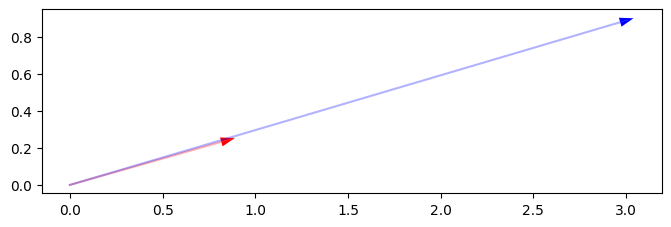

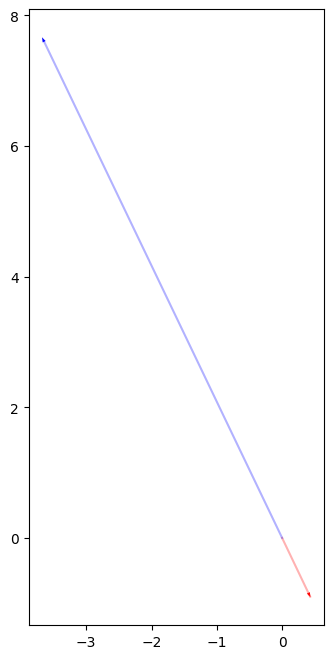

In [62]:
transform_with_Y_components(0.88, 0.25)

transform_with_Y_components(0.43,   -0.90)